In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import nrrd
import json
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.ontologies_api import OntologiesApi
import requests
from anatomy.anatomy_api import AnatomyApi
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from scipy.optimize import curve_fit
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.graphics import utils
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
import scipy

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [36]:
import platform
if platform.system() == 'Darwin':
    basepath = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN'
if platform.system() == 'Windows':
    basepath = r'C:\Users\jenniferwh\Dropbox (Allen Institute)\Mesoscale Connectome Papers in Progress\2019 DMN'
path = os.path.join(basepath, '_new_figures', 'Figure_6')

In [41]:
dat = pd.read_csv(os.path.join(path, 'projection_volume_PL_ACA_VISp_RSPv.csv'))
print(len(dat))

199


In [42]:
dat = dat[~dat['image-series-id'].isin([978126251, 978126988, 982673282, 983638049, 985967231, 987587524, 986803182,
                                        986804106, 972508277, 972510145, 972510876, 1.007E+09, 1.007E+09, 1.008E+09,
                                        1.008E+09, 912693448, 913810063, 913810874, 914299065, 914300081])]
print(len(dat))

183


In [43]:
dat = dat[dat['mouse-line'].isin(['Cux2-IRES-Cre', 'Rbp4-Cre_KL100'])]

In [44]:
pltdat = dat[['input-group', 'mouse-line', 'RSPv2/3-ipsi', 'RSPv5-ipsi']]
pltdat = dat.melt(id_vars = ['input-group', 'mouse-line'], value_vars = [
    'RSPv2/3-ipsi', 'RSPv5-ipsi'], var_name = 'layer', value_name = 'projection_volume')
pltdat.head()

,input-group,mouse-line,layer,projection_volume
0,ACA,Cux2-IRES-Cre,RSPv2/3-ipsi,0.071546
1,ACA,Cux2-IRES-Cre,RSPv2/3-ipsi,0.059172
2,ACA,Cux2-IRES-Cre,RSPv2/3-ipsi,0.032978
3,ACA,Cux2-IRES-Cre,RSPv2/3-ipsi,0.028440
4,ACA,Rbp4-Cre_KL100,RSPv2/3-ipsi,0.035774


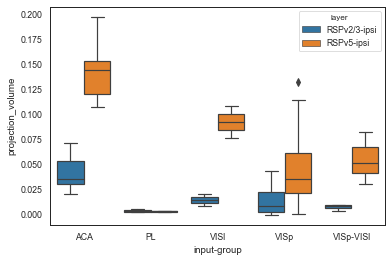

In [45]:
sns.boxplot('input-group', 'projection_volume', hue = 'layer', 
            data = pltdat)

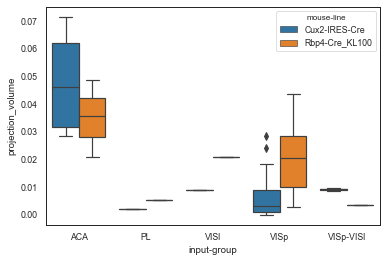

In [46]:
sns.boxplot('input-group', 'projection_volume', hue = 'mouse-line', 
            data = pltdat[pltdat['layer'] == 'RSPv2/3-ipsi'])

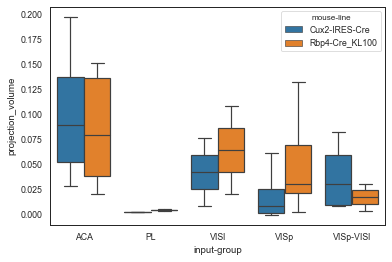

In [33]:
sns.boxplot('input-group', 'projection_volume', hue = 'mouse-line', 
            data = pltdat)